In [1]:
import sys

!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

!pip uninstall scikit-learn -y
!pip install -U scikit-learn
!pip install scikeras
!pip install https://github.com/ydataai/pandas-profiling/archive/master.zip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=9bbcee3576a1fc24b2cf18a5d16d1be473b27747a3cd0fc261d062de

In [2]:
from typing import List
import matplotlib.pyplot as plt

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import random
from matplotlib import pyplot
from matplotlib.colors import ListedColormap
from collections import Counter

import os, shutil
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer, SimpleImputer
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import *
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.utils import class_weight, compute_sample_weight
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import *
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

import requests

In [3]:
from google.colab import drive
drive.mount('/content/drive')
DATA_PATH = "/content/drive/MyDrive/Spaceship Titanic/Dati/"
IMAGE_PATH = "/content/drive/MyDrive/Spaceship Titanic/Immagini/Preprocessing/"

Mounted at /content/drive


# Si importa il dataset di training di Spaceship Titanic

---



In [4]:
dataset = pd.read_csv(DATA_PATH + "default_train.csv")
dataset

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


# Analisi degli attributi del dataset Spaceship Titanic

In [5]:
print(dataset.dtypes)
print("\n")
print(dataset.isnull().sum())

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


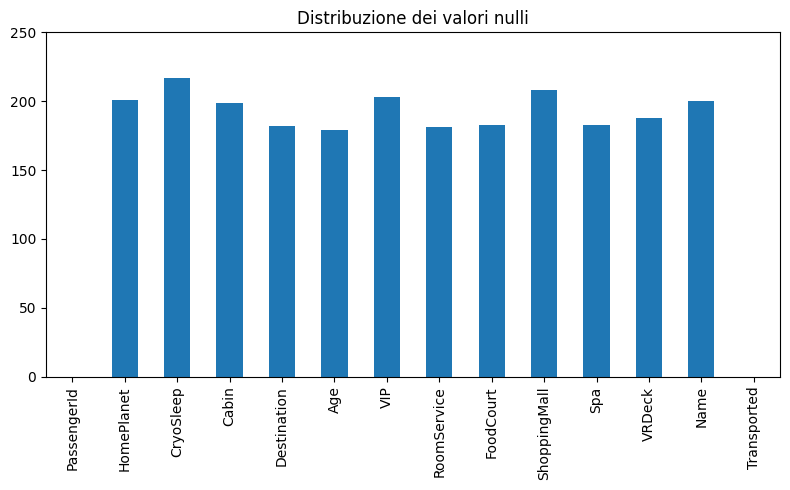

In [6]:
null_values = dataset.isnull().sum()
null_values.plot(figsize=(8,5), kind = 'bar', title="Distribuzione dei valori nulli", ylim=(0,250))
plt.tight_layout()
if(not os.path.exists(IMAGE_PATH + "Valori_nulli.png")):
  plt.savefig(IMAGE_PATH + "Valori_nulli.png", format="png")

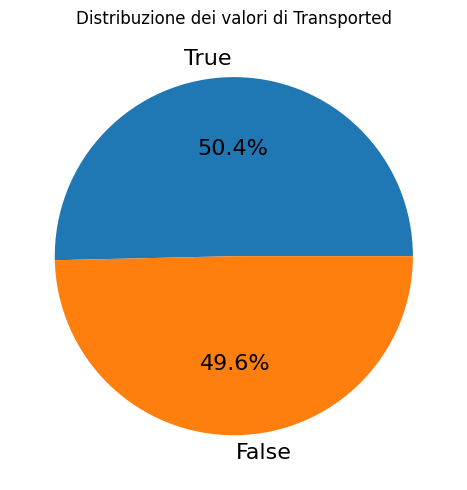

In [7]:
plt.figure(figsize=(5,5))
dataset.Transported.value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize':16}).set_title("Distribuzione dei valori di Transported")
plt.ylabel("")
plt.tight_layout()
if(not os.path.exists(IMAGE_PATH + "Transported.png")):
  plt.savefig(IMAGE_PATH + "Transported.png", format="png")

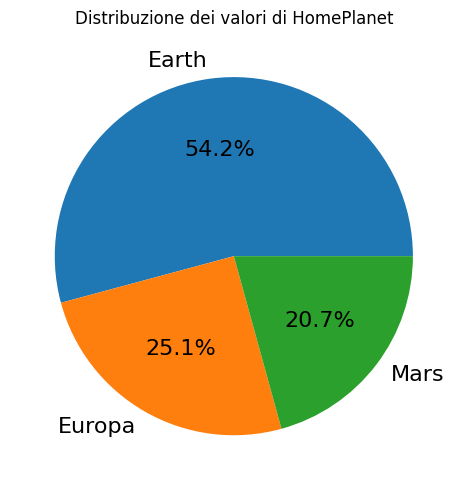

In [9]:
plt.figure(figsize=(5,5))
dataset.HomePlanet.value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize':16}).set_title("Distribuzione dei valori di HomePlanet")
plt.ylabel("")
plt.tight_layout()
if(not os.path.exists(IMAGE_PATH + "HomePlanet.png")):
  plt.savefig(IMAGE_PATH + "HomePlanet.png", format="png")

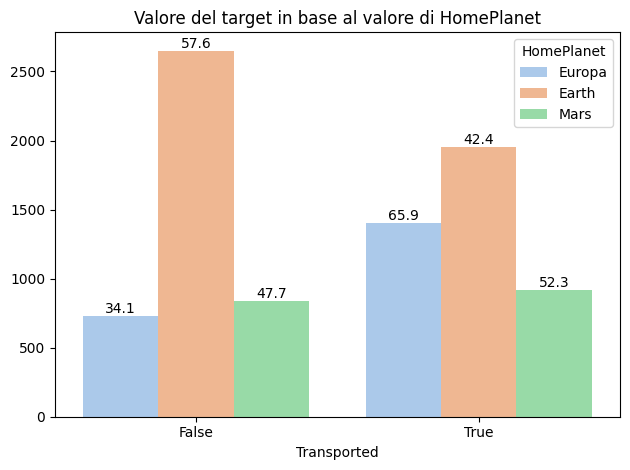

In [11]:
ax = sns.countplot(x='Transported',hue='HomePlanet',data=dataset,palette=sns.color_palette("pastel"))
ax.set_title(label="Valore del target in base al valore di HomePlanet")
ax.set_ylabel("")
values = dataset['HomePlanet'].unique()
for i in range(0, values.size-1):
  pct = dataset['Transported'].loc[dataset['HomePlanet']==values[i]].value_counts()*100/dataset['Transported'].loc[dataset['HomePlanet']==values[i]].shape[0]
  ax.bar_label(ax.containers[i], labels=[np.round(pct[pct.name.endswith('True')],1), np.round(pct[not pct.name.endswith('True')],1)])

plt.tight_layout()
if(not os.path.exists(IMAGE_PATH + "HomePlanet_Transported.png")):
  plt.savefig(IMAGE_PATH + "HomePlanet_Transported.png", format="png")

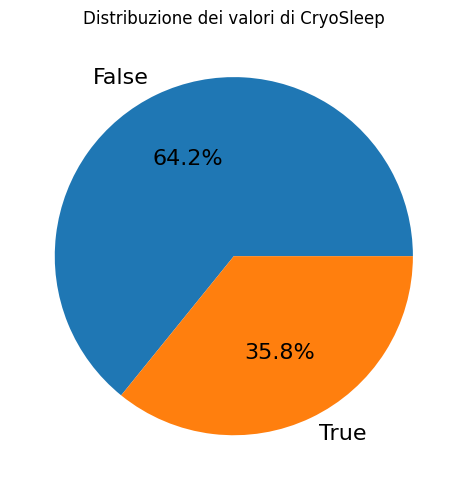

In [12]:
plt.figure(figsize=(5,5))
dataset.CryoSleep.value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize':16}).set_title("Distribuzione dei valori di CryoSleep")
plt.ylabel("")
plt.tight_layout()
if(not os.path.exists(IMAGE_PATH + "CryoSleep.png")):
  plt.savefig(IMAGE_PATH + "CryoSleep.png", format="png")

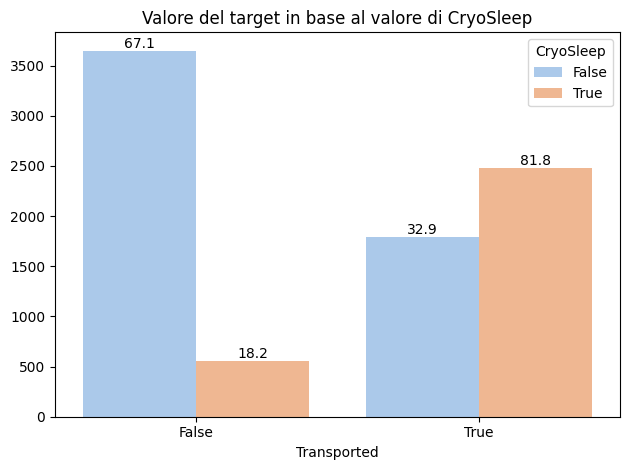

In [14]:
ax = sns.countplot(x='Transported',hue='CryoSleep',data=dataset,palette=sns.color_palette("pastel"))
ax.set_title(label="Valore del target in base al valore di CryoSleep")
ax.set_ylabel("")
values = dataset['CryoSleep'].unique()
for i in range(0, values.size-1):
  pct = dataset['Transported'].loc[dataset['CryoSleep']==values[i]].value_counts()*100/dataset['Transported'].loc[dataset['CryoSleep']==values[i]].shape[0]
  ax.bar_label(ax.containers[i], labels=[np.round(pct[pct.name.endswith('True')],1), np.round(pct[not pct.name.endswith('True')],1)])

plt.tight_layout()
if(not os.path.exists(IMAGE_PATH + "CryoSleep_Transported.png")):
  plt.savefig(IMAGE_PATH + "CryoSleep_Transported.png", format="png")

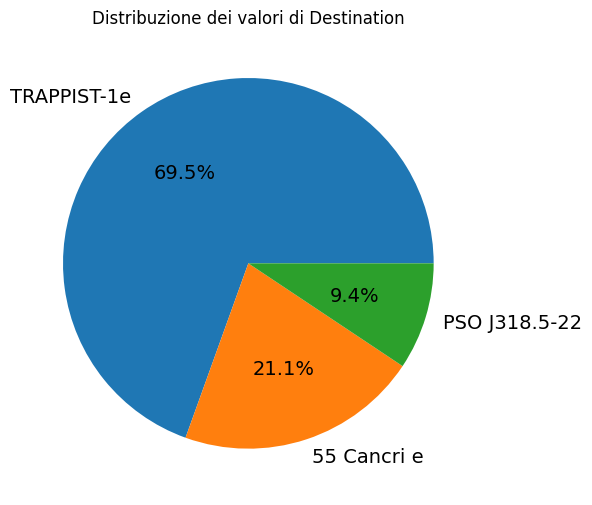

In [18]:
plt.figure(figsize=(6,6))
dataset.Destination.value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize':14}).set_title("Distribuzione dei valori di Destination")
plt.ylabel("")
plt.tight_layout()
if(not os.path.exists(IMAGE_PATH + "Destination.png")):
  plt.savefig(IMAGE_PATH + "Destination.png", format="png")

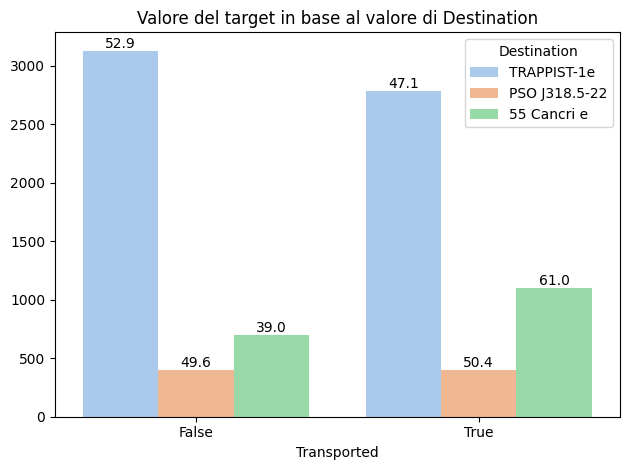

In [19]:
ax = sns.countplot(x='Transported',hue='Destination',data=dataset,palette=sns.color_palette("pastel"))
ax.set_title(label="Valore del target in base al valore di Destination")
ax.set_ylabel("")
values = dataset['Destination'].unique()
for i in range(0, values.size-1):
  pct = dataset['Transported'].loc[dataset['Destination']==values[i]].value_counts()*100/dataset['Transported'].loc[dataset['Destination']==values[i]].shape[0]
  ax.bar_label(ax.containers[i], labels=[np.round(pct[pct.name.endswith('True')],1), np.round(pct[not pct.name.endswith('True')],1)])

plt.tight_layout()
if(not os.path.exists(IMAGE_PATH + "Destination_Transported.png")):
  plt.savefig(IMAGE_PATH + "Destination_Transported.png", format="png")

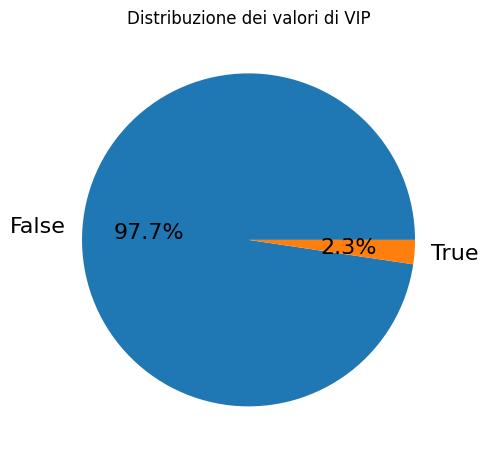

In [21]:
plt.figure(figsize=(5,5))
dataset.VIP.value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize':16}).set_title("Distribuzione dei valori di VIP")
plt.ylabel("")
plt.tight_layout()
if(not os.path.exists(IMAGE_PATH + "VIP.png")):
  plt.savefig(IMAGE_PATH + "VIP.png", format="png")

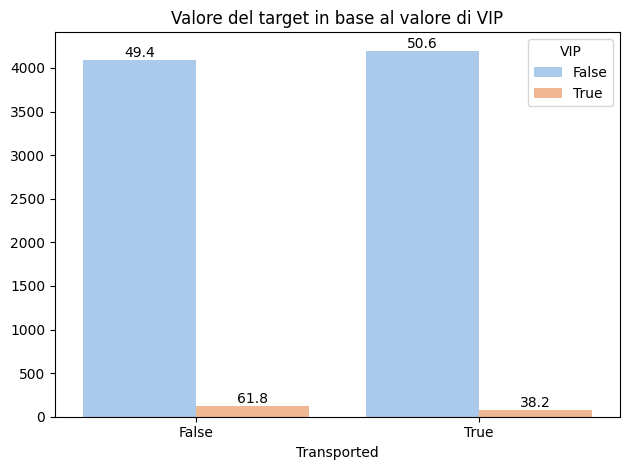

In [22]:
ax = sns.countplot(x='Transported',hue='VIP',data=dataset,palette=sns.color_palette("pastel"))
ax.set_title(label="Valore del target in base al valore di VIP")
ax.set_ylabel("")
values = dataset['VIP'].unique()
for i in range(0, values.size-1):
  pct = dataset['Transported'].loc[dataset['VIP']==values[i]].value_counts()*100/dataset['Transported'].loc[dataset['VIP']==values[i]].shape[0]
  ax.bar_label(ax.containers[i], labels=[np.round(pct[pct.name.endswith('True')],1), np.round(pct[not pct.name.endswith('True')],1)])

plt.tight_layout()
if(not os.path.exists(IMAGE_PATH + "VIP_Transported.png")):
  plt.savefig(IMAGE_PATH + "VIP_Transported.png", format="png")

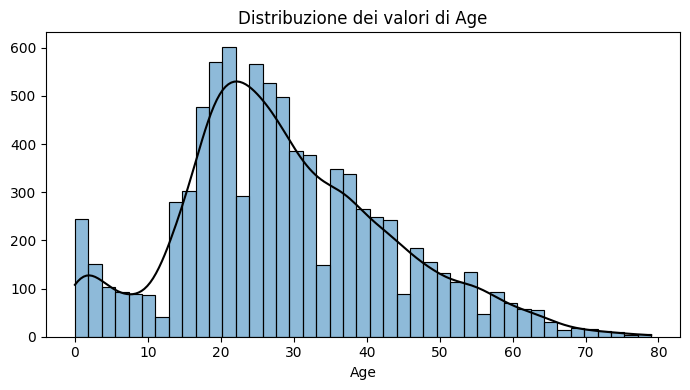

In [26]:
plt.figure(figsize=(7,4))
ax = sns.histplot(x='Age',data=dataset, kde='True')
ax.lines[0].set_color('black')
ax.set_title("Distribuzione dei valori di Age")
ax.set_ylabel("")
plt.tight_layout()
if(not os.path.exists(IMAGE_PATH + "Age.png")):
  plt.savefig(IMAGE_PATH + "Age.png", format="png")
plt.show()

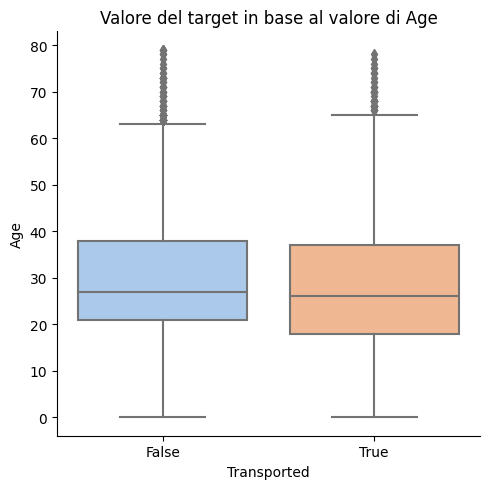

In [28]:
sns.catplot(data=dataset, x='Transported', y='Age', kind="box",palette=sns.color_palette("pastel"))
plt.title("Valore del target in base al valore di Age")
plt.tight_layout()
if(not os.path.exists(IMAGE_PATH + "Age_Transported.png")):
  plt.savefig(IMAGE_PATH + "Age_Transported.png", format="png")
plt.show()

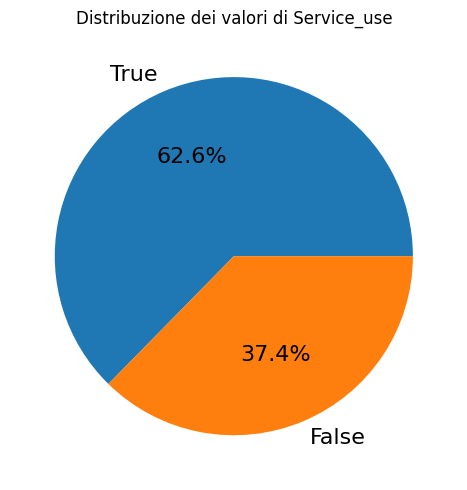

In [30]:
ds = dataset.copy()
ds['Service_use'] = 0
ds['Service_use']  = ds['VRDeck'] + ds['RoomService'] + ds['FoodCourt'] + ds['ShoppingMall'] + ds['Spa'] != 0.0
plt.figure(figsize=(5,5))
ds.Service_use.value_counts().plot.pie(autopct='%1.1f%%', textprops={'fontsize':16}).set_title("Distribuzione dei valori di Service_use")
plt.ylabel("")
plt.tight_layout()
if(not os.path.exists(IMAGE_PATH + "Service_use.png")):
  plt.savefig(IMAGE_PATH + "Service_use.png", format="png")

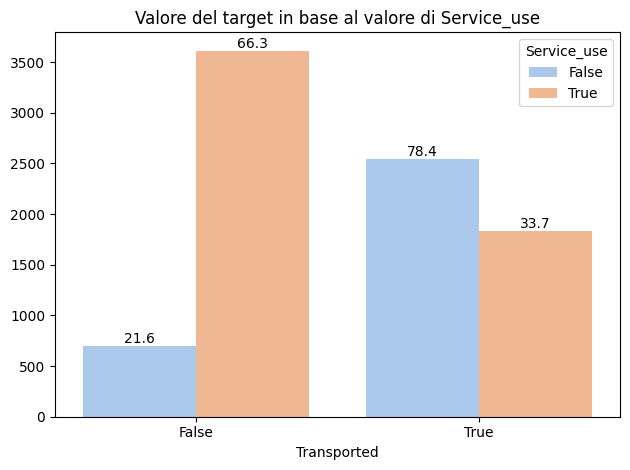

In [31]:
ax = sns.countplot(x='Transported',hue='Service_use',data=ds,palette=sns.color_palette("pastel"))
ax.set_title(label="Valore del target in base al valore di Service_use")
ax.set_ylabel("")
values = dataset['VIP'].unique()
for i in range(0, values.size-1):
  pct = ds['Transported'].loc[ds['Service_use']==values[i]].value_counts()*100/ds['Transported'].loc[ds['Service_use']==values[i]].shape[0]
  ax.bar_label(ax.containers[i], labels=[np.round(pct[pct.name.endswith('True')],1), np.round(pct[not pct.name.endswith('True')],1)])

plt.tight_layout()
if(not os.path.exists(IMAGE_PATH + "Service_use_Transported.png")):
  plt.savefig(IMAGE_PATH + "Service_use_Transported.png", format="png")

# Si sostituiscono tutti i valori nulli e si trasformano tutti gli attributi non numerici in attributi numerici

In [32]:
def array_to_dataframe(arr: np.ndarray, columns: List[str]):
    return pd.DataFrame(data=arr, columns=columns)

compute_percentages() e pct_substitution() sostituiscono i valori nulli categorici in base alla loro frequenza

In [33]:
def compute_percentages(col):
    # Exclude NaN values from the data
    filtered_data = col.dropna() #[value for value in col]

    # Count the occurrences of each unique value
    value_counts = Counter(filtered_data)

    # Calculate the total number of non-NaN values
    total_values = len(filtered_data)

    # Calculate the percentage for each unique value
    percentages = {value: (count / total_values) for value, count in value_counts.items()}

    return percentages

In [34]:
def pct_substitution(ds, name_col):
  pct = compute_percentages(ds[name_col])
  probability = list(pct.values())
  ds[name_col] = ds[name_col].apply(lambda x: np.random.choice(list(pct.keys()), 1, replace=False, p=probability)[0] if pd.isna(x) else x)

In [35]:
def fill_na(ds):
  numerical_cols = [cname for cname in ds.columns if ds[cname].dtype in ['float64']]
  # X_num_arr = SimpleImputer(strategy="median").fit_transform(ds[numerical_cols])
  # X_num_arr = IterativeImputer(random_state=42).fit_transform(ds[numerical_cols])
  X_num_arr = KNNImputer().fit_transform(ds[numerical_cols])
  X_num = array_to_dataframe(arr=X_num_arr, columns=ds[numerical_cols].columns)

  # ds[numerical_cols].fillna(round(ds[name].mean(),0), inplace=True)
  # ds[numerical_cols].fillna(method ='ffill', inplace=True)
  # ds[numerical_cols].fillna(method ='bfill', inplace=True)
  # X_cat_arr = SimpleImputer(strategy="most_frequent").fit_transform(ds[categorical_cols])
  # X_cat = array_to_dataframe(arr=categorical_cols, columns=ds[categorical_cols].columns)

  for name in ["HomePlanet", "Destination", "CryoSleep", "VIP"]:
    pct_substitution(ds, name)

  categorical_cols = [cname for cname in ds.columns if ds[cname].nunique() < 10]
  X_cat = ds[categorical_cols]

  #Cerco tra i passeggeri senza cabina quelli dello stesso nucleo familiare e assegno la loro stessa cabina
  ds1 = ds.copy()
  ds1[["gggg","pp"]] = ds1["PassengerId"].str.split("_", expand=True)
  Cabin = ds1[["gggg", "pp", "Cabin"]].copy()
  for i in range(1, len(Cabin)-1):
    if pd.isnull(Cabin.Cabin[i]):
      if Cabin.gggg[i-1] == Cabin.gggg[i] and not pd.isnull(Cabin.Cabin[i-1]):
        Cabin.Cabin[i] = Cabin.Cabin[i-1]
      elif Cabin.gggg[i+1] == Cabin.gggg[i] and not pd.isnull(Cabin.Cabin[i+1]):
        Cabin.Cabin[i] = Cabin.Cabin[i+1]

  #Per i passeggeri restanti, assegno numeri di cabina casuali, ma uguali se c'è un'intera famiglia senza cabina
  Cabin[["Deck", "Cabin_num", "Side"]] = Cabin["Cabin"].str.split("/", expand=True)
  Cabin = Cabin.drop('Cabin', axis=1)
  for j in range(1, len(Cabin)-1):
    if pd.isnull(Cabin.Cabin_num[j]):
      if Cabin.gggg[j-1] == Cabin.gggg[j] and not pd.isnull(Cabin.Cabin_num[j-1]) :
        Cabin.Cabin_num[j] = Cabin.Cabin_num[j-1]
        Cabin.Deck[j] = Cabin.Deck[j-1]
        Cabin.Side[j] = Cabin.Side[j-1]
      elif Cabin.gggg[j+1] == Cabin.gggg[j] and not pd.isnull(Cabin.Cabin_num[j+1]):
        Cabin.Cabin_num[j] = Cabin.Cabin_num[j+1]
        Cabin.Deck[j] = Cabin.Deck[j+1]
        Cabin.Side[j] = Cabin.Side[j+1]
      else:
        Cabin.Cabin_num[j] = random.randint(int(Cabin.Cabin_num[j-1]) + 1, int(Cabin.Cabin_num[j-1]) + 100)
        Cabin.Deck[j] = Cabin.Deck[j-1]
        Cabin.Side[j] = Cabin.Side[j-1]

  Cabin["Cabin_num"] = Cabin["Cabin_num"].astype(int)
  X_concat = pd.concat([Cabin, X_cat, X_num], axis=1)
  return X_concat

In [36]:
def get_my_numeric_dataframe(path):
  ds = pd.read_csv(path)
  ds.drop(columns=["Name"], inplace=True)
  if hasattr(ds, "Transported"):
    ds.drop(columns=["Transported"], inplace=True)

  df = fill_na(ds)

  df["VIP"] = df["VIP"].astype(int)
  df["CryoSleep"] = df["CryoSleep"].astype(int)
  df["gggg"]=df["gggg"].astype(int)
  df["pp"]=df["pp"].astype(int)

  df["Side1"] = df["Side"].replace(to_replace=["P", "S"], value=[0, 1])
  df.drop(columns=["Side"], inplace=True)
  df.rename(columns={"Side1": "Side"}, inplace=True)

  df["HomePlanet1"] = df["HomePlanet"].replace(to_replace=["Earth", "Europa", "Mars"], value=[0, 1, 2])
  df.drop(columns=["HomePlanet"], inplace=True)
  df.rename(columns={"HomePlanet1": "HomePlanet"}, inplace=True)

  df["Destination1"] = df["Destination"].replace(to_replace=["TRAPPIST-1e", "55 Cancri e", "PSO J318.5-22"], value=[0, 1, 2])
  df.drop(columns=["Destination"], inplace=True)
  df.rename(columns={"Destination1": "Destination"}, inplace=True)


  df["Deck1"] = df["Deck"].replace(to_replace=["A", "B", "C", "D", "E", "F", "G", "T"], value=[0, 1, 2, 3, 4, 5, 6, 7])
  df.drop(columns=["Deck"], inplace=True)
  df.rename(columns={"Deck1": "Deck"}, inplace=True)
  df = df[['gggg', 'pp', 'Deck', 'Cabin_num', 'Side', 'HomePlanet', 'Destination', 'CryoSleep', 'VIP', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]
  return df

In [37]:
def one_hot_encoding_dataframe(path):
  ds = pd.read_csv(path)
  ds.drop(columns=["Name"], inplace=True)
  if hasattr(ds, "Transported"):
    ds.drop(columns=["Transported"], inplace=True)

  df = fill_na(ds)

  df["VIP"] = df["VIP"].astype(int)
  df["CryoSleep"] = df["CryoSleep"].astype(int)
  df["gggg"]=df["gggg"].astype(int)
  df["pp"]=df["pp"].astype(int)

  #le colonne categoriche hanno cardinalità minore di 10, quindi applichiamo one-hot encoding
  categorical_cols = [cname for cname in df.columns if df[cname].nunique() < 10 and df[cname].dtype == "object"]
  numerical_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]
  one_hot_encoded_training_predictors = pd.get_dummies(df[categorical_cols])
  df_numeric = pd.concat([one_hot_encoded_training_predictors, df[numerical_cols]], axis=1)
  df_numeric = df_numeric[['gggg', 'pp', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Cabin_num', 'Side_P', 'Side_S', 'HomePlanet_Earth', 'HomePlanet_Europa',
                           'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'CryoSleep', 'VIP', 'Age', 'RoomService',
                           'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]
  return df_numeric

In [39]:
X_train15, y_train15 = get_my_numeric_dataframe(DATA_PATH + "default_train.csv"), dataset.Transported
X_train15

,gggg,pp,Deck,Cabin_num,Side,HomePlanet,Destination,CryoSleep,VIP,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,1,1,0,0,1,0,0,0,39.0,0.0,0.0,0.0,0.0,0.0
1,2,1,5,0,1,0,0,0,0,24.0,109.0,9.0,25.0,549.0,44.0
2,3,1,0,0,1,1,0,0,1,58.0,43.0,3576.0,0.0,6715.0,49.0
3,3,2,0,0,1,1,0,0,0,33.0,0.0,1283.0,371.0,3329.0,193.0
4,4,1,5,1,1,0,0,0,0,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276,1,0,98,0,1,1,0,1,41.0,0.0,6819.0,0.0,1643.0,74.0
8689,9278,1,6,1499,1,0,2,1,0,18.0,0.0,0.0,0.0,0.0,0.0
8690,9279,1,6,1500,1,0,0,0,0,26.0,0.0,0.0,1872.0,1.0,0.0
8691,9280,1,4,608,1,1,1,0,0,32.0,0.0,1049.0,0.0,353.0,3235.0


In [41]:
X_train27, y_train27 = one_hot_encoding_dataframe(DATA_PATH + "default_train.csv"), dataset.Transported
X_train27

,gggg,pp,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep,VIP,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,1,0,1,0,0,0,0,0,0,...,0,1,0,0,39.0,0.0,0.0,0.0,0.0,0.0
1,2,1,0,0,0,0,0,1,0,0,...,0,1,0,0,24.0,109.0,9.0,25.0,549.0,44.0
2,3,1,1,0,0,0,0,0,0,0,...,0,1,0,1,58.0,43.0,3576.0,0.0,6715.0,49.0
3,3,2,1,0,0,0,0,0,0,0,...,0,1,0,0,33.0,0.0,1283.0,371.0,3329.0,193.0
4,4,1,0,0,0,0,0,1,0,0,...,0,1,0,0,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276,1,1,0,0,0,0,0,0,0,...,0,0,0,1,41.0,0.0,6819.0,0.0,1643.0,74.0
8689,9278,1,0,0,0,0,0,0,1,0,...,1,0,1,0,18.0,0.0,0.0,0.0,0.0,0.0
8690,9279,1,0,0,0,0,0,0,1,0,...,0,1,0,0,26.0,0.0,0.0,1872.0,1.0,0.0
8691,9280,1,0,0,0,0,1,0,0,0,...,0,0,0,0,32.0,0.0,1049.0,0.0,353.0,3235.0


# Analisi per capire quali sono gli attributi più importanti

Si usa Random Forest per capire l'importanza degli attributi

In [50]:
def show_sorted_scores_rf(rf, X, fig_height, fig_lenght, train_type, img_title):
  cols = [cname for cname in X.columns]
  scores = rf.feature_importances_
  mapping_col_score = {cols[i]: scores[i] for i in range(len(cols))}
  mapping_col_score_sorted = dict(sorted(mapping_col_score.items(), key=lambda x:x[1]))
  sorted_cols = list(mapping_col_score_sorted.keys())
  sorted_scores = list(mapping_col_score_sorted.values())
  plt.figure(figsize=(fig_height, fig_lenght))
  plt.title(label='Importanza degli attributi determinata da Random Forest ' + str(train_type), fontsize=13)
  plt.xlabel(xlabel='Score', fontsize=11)
  plt.barh(sorted_cols, sorted_scores, height=0.6)
  plt.tight_layout()
  if(not os.path.exists(IMAGE_PATH + str(img_title))):
    plt.savefig(IMAGE_PATH + str(img_title), format="png")
  plt.show()

In [44]:
rf15 = RandomForestClassifier(n_estimators=300, max_depth=8, random_state=42, warm_start=True)
rf15.fit(X_train15, y_train15)

RandomForestClassifier(max_depth=8, n_estimators=300, random_state=42,
                       warm_start=True)

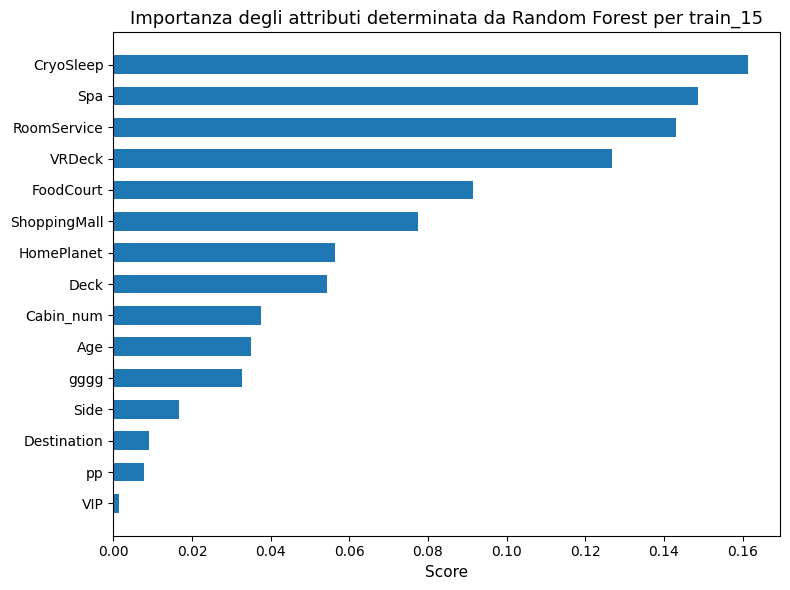

In [56]:
show_sorted_scores_rf(rf15, X_train15, 8, 6, 'per train_15', "Imp_attr_RF_15.png")

In [52]:
rf27 = RandomForestClassifier(n_estimators=300, max_depth=8, random_state=42, warm_start=True)
rf27.fit(X_train27, y_train27)

RandomForestClassifier(max_depth=8, n_estimators=300, random_state=42,
                       warm_start=True)

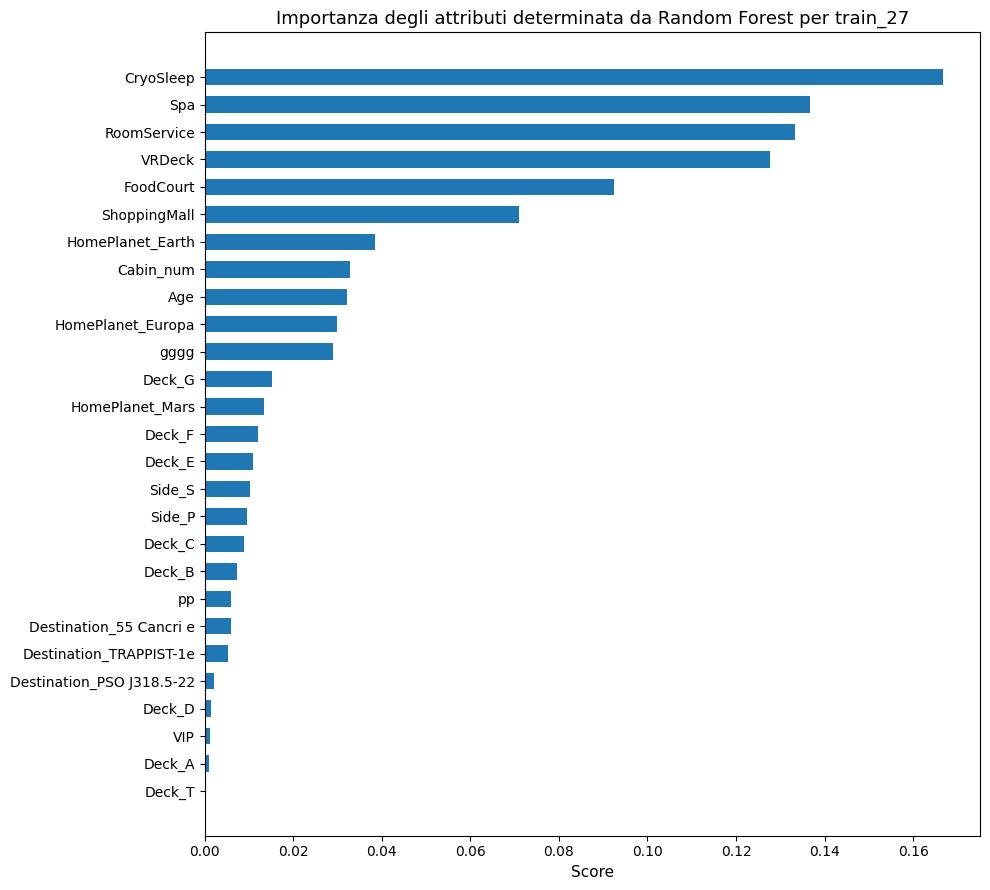

In [57]:
show_sorted_scores_rf(rf27, X_train27, 10, 9, 'per train_27', "Imp_attr_RF_27.png")

Si usa SelectKBest che seleziona i K attributi più rilevanti

In [61]:
def show_sorted_scores_kbest(kbest, X, fig_lenght, fig_height, l1, l2, l3, train_type, img_title):
  cols = [cname for cname in X.columns]
  scores = kbest.scores_
  mapping_col_score = {cols[i]: scores[i] for i in range(len(cols))}
  mapping_col_score_sorted = dict(sorted(mapping_col_score.items(), key=lambda x:x[1]))
  sorted_cols = list(mapping_col_score_sorted.keys())
  sorted_scores = list(mapping_col_score_sorted.values())
  plt.figure(figsize=(14,16))
  fig, ax = plt.subplots(2, 2, constrained_layout = True, figsize=(fig_lenght, fig_height))
  fig.suptitle('Importanza degli attributi secondo SelectKBest ' + str(train_type))
  ax[0,0].barh(sorted_cols, sorted_scores, height=0.6)
  ax[0,1].barh(sorted_cols[:l1], sorted_scores[:l1], height=0.6)
  ax[1,0].barh(sorted_cols[:l2], sorted_scores[:l2], height=0.6)
  ax[1,1].barh(sorted_cols[:l3], sorted_scores[:l3], height=0.6)
  plt.tight_layout()
  if(not os.path.exists(IMAGE_PATH + str(img_title))):
    plt.savefig(IMAGE_PATH + str(img_title), format="png")
  plt.show()

In [55]:
kbest15 = SelectKBest(chi2, k=5)
kbest15.fit(X_train15, y_train15)
X_train15.columns[kbest15.get_support()]

Index(['Cabin_num', 'RoomService', 'FoodCourt', 'Spa', 'VRDeck'], dtype='object')

<ipython-input-61-8d55a410fd36>:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1400x1600 with 0 Axes>

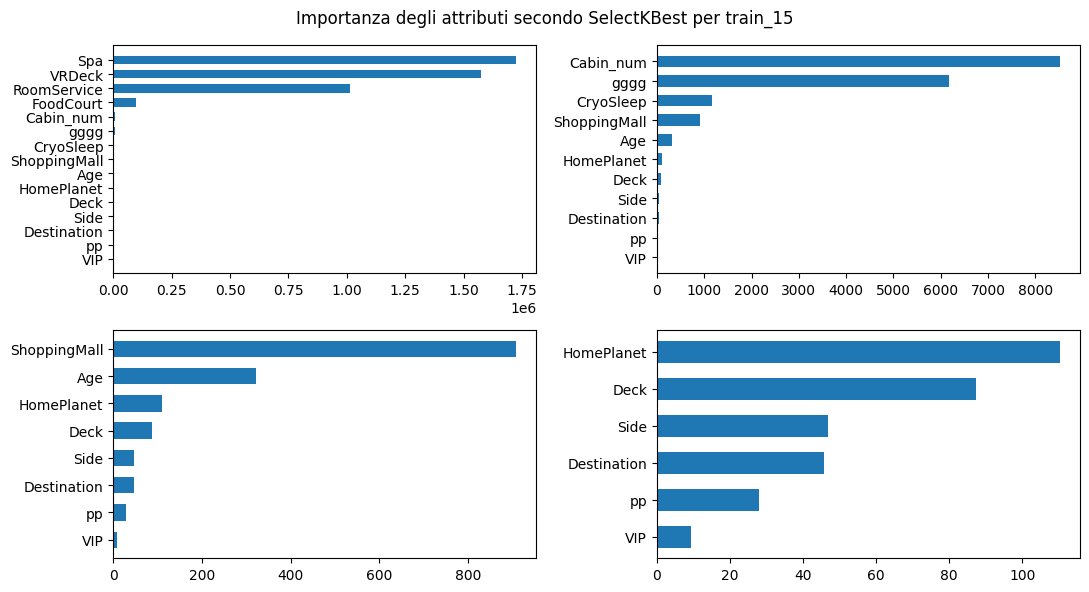

In [62]:
show_sorted_scores_kbest(kbest15, X_train15, 11, 6, 11, 8, 6, 'per train_15', "Imp_attr_SelectKBest_15.png")

In [63]:
kbest27 = SelectKBest(chi2, k=9)
kbest27.fit(X_train27, y_train27)
X_train27.columns[kbest27.get_support()]

Index(['gggg', 'Cabin_num', 'CryoSleep', 'Age', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck'],
      dtype='object')

<ipython-input-61-8d55a410fd36>:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1400x1600 with 0 Axes>

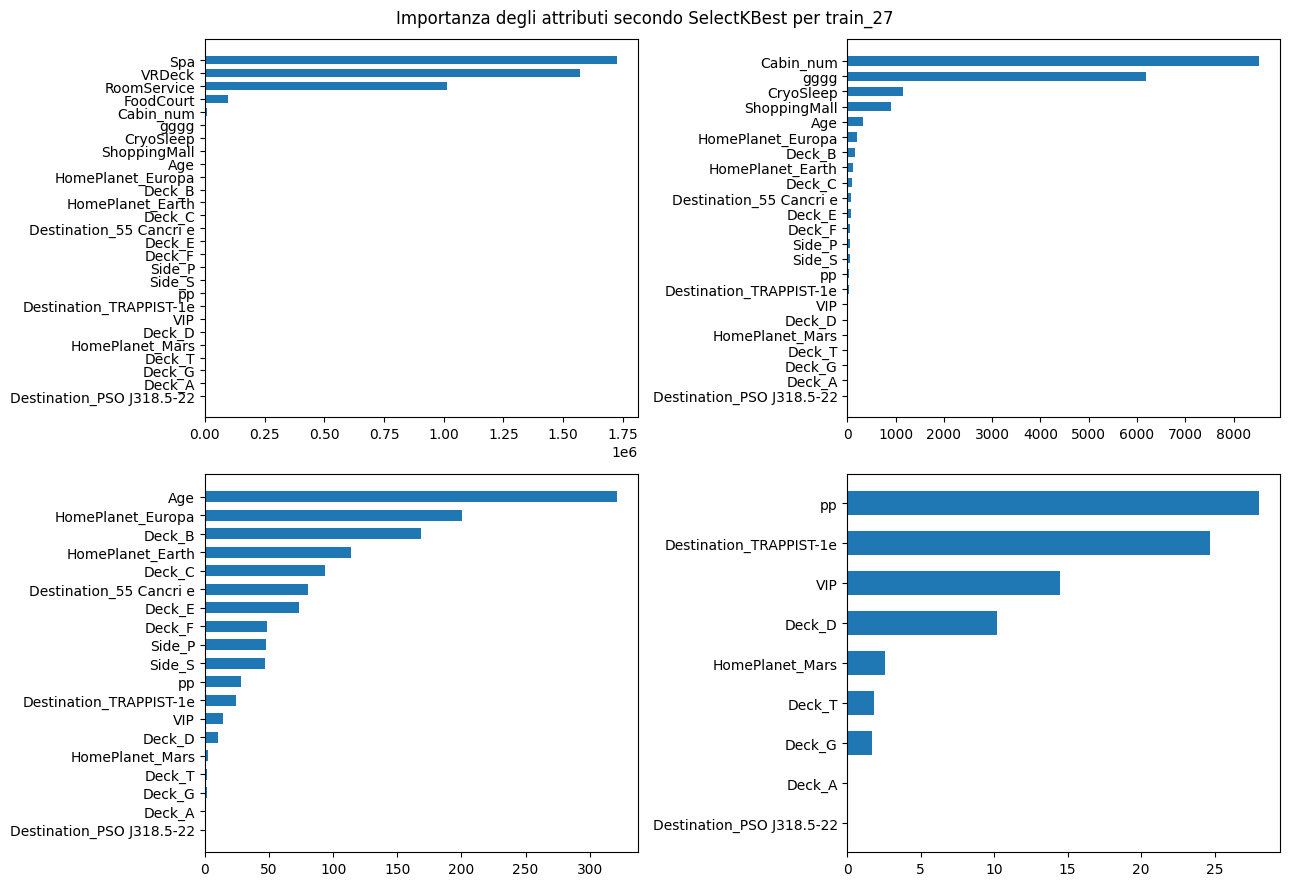

In [64]:
show_sorted_scores_kbest(kbest27, X_train27, 13, 9, 23, 19, 9, 'per train_27', "Imp_attr_SelectKBest_27.png")

Si usa Recursive Feature Elimination

In [ ]:
def get_rfe_ranking(mb_fselector, columns,):
    return pd.DataFrame(
        data=[mb_fselector.ranking_], index=["ranking"], columns=columns,
    ).T.sort_values(by="ranking", ascending=True)

In [ ]:
rfe15 = RFE(estimator = GradientBoostingClassifier(), n_features_to_select=1, step=1)
rfe15.fit(X_train15, y_train15)
X_train15.columns[rfe15.support_]

Index(['CryoSleep'], dtype='object')

In [ ]:
get_rfe_ranking(rfe15, X_train15.columns)

,ranking
CryoSleep,1
Spa,2
RoomService,3
HomePlanet,4
VRDeck,5
FoodCourt,6
Cabin_num,7
Deck,8
ShoppingMall,9
Age,10


In [ ]:
rfe27 = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=1, step=1)
rfe27.fit(X_train27, y_train27)
X_train27.columns[rfe27.support_]

Index(['CryoSleep'], dtype='object')

In [ ]:
get_rfe_ranking(rfe27, X_train27.columns)

,ranking
CryoSleep,1
Spa,2
RoomService,3
VRDeck,4
FoodCourt,5
HomePlanet_Earth,6
Cabin_num,7
ShoppingMall,8
HomePlanet_Europa,9
Age,10


Si prova a vedere quali sono gli attributi più convenienti da eliminare

In [ ]:
rf15 = RandomForestClassifier(n_estimators=300, max_depth=8, random_state=42, warm_start=True)
rf15.fit(X_train15, y_train15)
rf15_score = rf15.score(X_train15, y_train15)
print("Score Random Forest su X_train15 con tutti gli attributi: " + str(np.round(rf15_score,4)))

X_train14 = X_train15.drop(columns=['Destination'])
rf14 = RandomForestClassifier(n_estimators=300, max_depth=8, random_state=42, warm_start=True)
rf14.fit(X_train14, y_train15)
rf14_score = rf14.score(X_train14, y_train15)
print("Score Random Forest su X_train15 senza Destination: " + str(np.round(rf14_score,4)))

X_train14 = X_train15.drop(columns=['pp'])
rf14 = RandomForestClassifier(n_estimators=300, max_depth=8, random_state=42, warm_start=True)
rf14.fit(X_train14, y_train15)
rf14_score = rf14.score(X_train14, y_train15)
print("Score Random Forest su X_train15 senza pp: " + str(np.round(rf14_score,4)))

X_train14 = X_train15.drop(columns=['VIP'])
rf14 = RandomForestClassifier(n_estimators=300, max_depth=8, random_state=42, warm_start=True)
rf14.fit(X_train14, y_train15)
rf14_score = rf14.score(X_train14, y_train15)
print("Score Random Forest su X_train15 senza VIP: " + str(np.round(rf14_score,4)))

X_train13 = X_train15.drop(columns=['VIP', 'pp'])
rf13 = RandomForestClassifier(n_estimators=300, max_depth=8, random_state=42, warm_start=True)
rf13.fit(X_train13, y_train15)
rf13_score = rf13.score(X_train13, y_train15)
print("Score Random Forest su X_train15 senza pp e VIP: " + str(np.round(rf13_score,4)))

Score Random Forest su X_train15 con tutti gli attributi: 0.8334
Score Random Forest su X_train15 senza Destination: 0.8323
Score Random Forest su X_train15 senza pp: 0.8332
Score Random Forest su X_train15 senza VIP: 0.8343
Score Random Forest su X_train15 senza pp e VIP: 0.8368


Conclusione per X_train15: conviene rimuovere gli attributi pp e VIP

In [ ]:
rf27 = RandomForestClassifier(n_estimators=350, max_depth=5, max_features=10, random_state=42, warm_start=True)
rf27.fit(X_train27, y_train27)
rf27_score = rf27.score(X_train27, y_train27)
print("Score Random Forest su X_train27 con tutti gli attributi: " + str(np.round(rf27_score,4)))

X_train26 = X_train27.drop(columns=['Destination_TRAPPIST-1e'])
rf26 = RandomForestClassifier(n_estimators=350, max_depth=5, max_features=10, random_state=42, warm_start=True)
rf26.fit(X_train26, y_train27)
rf26_score = rf26.score(X_train26, y_train27)
print("Score Random Forest su X_train27 senza Destination_TRAPPIST-1e: " + str(np.round(rf26_score,4)))

X_train25 = X_train27.drop(columns=['Destination_TRAPPIST-1e', 'Destination_PSO J318.5-22'])
rf25 = RandomForestClassifier(n_estimators=350, max_depth=5, max_features=10, random_state=42, warm_start=True)
rf25.fit(X_train25, y_train27)
rf25_score = rf25.score(X_train25, y_train27)
print("Score Random Forest su X_train27 senza Destination_TRAPPIST-1e e Destination_PSO J318.5-22: " + str(np.round(rf25_score,4)))

X_train25 = X_train27.drop(columns=['VIP', 'pp'])
rf25 = RandomForestClassifier(n_estimators=350, max_depth=5, max_features=10, random_state=42, warm_start=True)
rf25.fit(X_train25, y_train27)
rf25_score = rf25.score(X_train25, y_train27)
print("Score Random Forest su X_train27 senza VIP e pp: " + str(np.round(rf25_score,4)))

X_train24 = X_train27.drop(columns=['VIP', 'pp', 'Destination_PSO J318.5-22'])
rf24 = RandomForestClassifier(n_estimators=350, max_depth=5, max_features=10, random_state=42, warm_start=True)
rf24.fit(X_train24, y_train27)
rf24_score = rf24.score(X_train24, y_train27)
print("Score Random Forest su X_train27 senza VIP, pp e Destination_PSO J318.5-22: " + str(np.round(rf24_score,4)))

X_train24 = X_train27.drop(columns=['VIP', 'pp', 'Deck_T'])
rf24 = RandomForestClassifier(n_estimators=350, max_depth=5, max_features=10, random_state=42, warm_start=True)
rf24.fit(X_train24, y_train27)
rf24_score = rf24.score(X_train24, y_train27)
print("Score Random Forest su X_train27 senza VIP, pp e Deck_T: " + str(np.round(rf24_score,4)))

X_train22 = X_train27.drop(columns=['VIP', 'pp', 'Deck_A', 'Deck_T', 'Deck_D'])
rf22 = RandomForestClassifier(n_estimators=350, max_depth=5, max_features=10, random_state=42, warm_start=True)
rf22.fit(X_train22, y_train27)
rf22_score = rf22.score(X_train22, y_train27)
print("Score Random Forest su X_train27 senza VIP, pp, Deck_A, Deck_T e Deck_D: " + str(np.round(rf22_score,4)))

Score Random Forest su X_train27 con tutti gli attributi: 0.8003
Score Random Forest su X_train27 senza Destination_TRAPPIST-1e: 0.8002
Score Random Forest su X_train27 senza Destination_TRAPPIST-1e e Destination_PSO J318.5-22: 0.7996
Score Random Forest su X_train27 senza VIP e pp: 0.8003
Score Random Forest su X_train27 senza VIP, pp e Destination_PSO J318.5-22: 0.7995
Score Random Forest su X_train27 senza VIP, pp e Deck_T: 0.8008
Score Random Forest su X_train27 senza VIP, pp, Deck_A, Deck_T e Deck_D: 0.8018


Conclusione per X_train27: conviene rimuovere gli attributi VIP, pp, Deck_A, Deck_T e Deck_D

Si aggiungono gli attributi Service_use ed Expenses, valutandone la loro importanza e il loro impatto nel predire il classificatore

In [65]:
X_train13 = X_train15.drop(columns=['VIP', 'pp'])
X_train13['Service_use'] = 0
X_train13['Service_use']  = X_train13['VRDeck'] + X_train13['RoomService'] + X_train13['FoodCourt'] + X_train13['ShoppingMall'] + X_train13['Spa'] != 0.0
X_train13['Service_use'] = X_train13['Service_use'].astype(int)
X_train13['Expenses']  = X_train13['VRDeck'] + X_train13['RoomService'] + X_train13['FoodCourt'] + X_train13['ShoppingMall'] + X_train13['Spa']

rf13 = RandomForestClassifier(n_estimators=300, max_depth=8, random_state=42, warm_start=True)
rf13.fit(X_train13, y_train15)

RandomForestClassifier(max_depth=8, n_estimators=300, random_state=42,
                       warm_start=True)

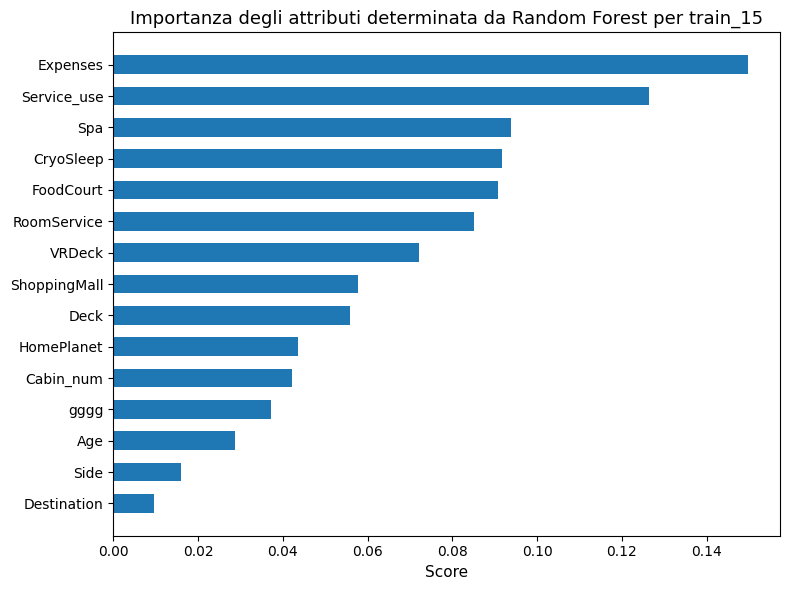

In [66]:
show_sorted_scores_rf(rf13, X_train13, 8, 6, 'per train_15', "Imp_attr_RF_nuovo_15.png")

In [67]:
X_train22 = X_train27.drop(columns=['VIP', 'pp', 'Deck_A', 'Deck_T', 'Deck_D'])
X_train22['Service_use'] = 0
X_train22['Service_use']  = X_train22['VRDeck'] + X_train22['RoomService'] + X_train22['FoodCourt'] + X_train22['ShoppingMall'] + X_train22['Spa'] != 0.0
X_train22['Service_use'] = X_train22['Service_use'].astype(int)
X_train22['Expenses']  = X_train22['VRDeck'] + X_train22['RoomService'] + X_train22['FoodCourt'] + X_train22['ShoppingMall'] + X_train22['Spa']

rf22 = RandomForestClassifier(n_estimators=300, max_depth=8, random_state=42, warm_start=True)
rf22.fit(X_train22, y_train27)

RandomForestClassifier(max_depth=8, n_estimators=300, random_state=42,
                       warm_start=True)

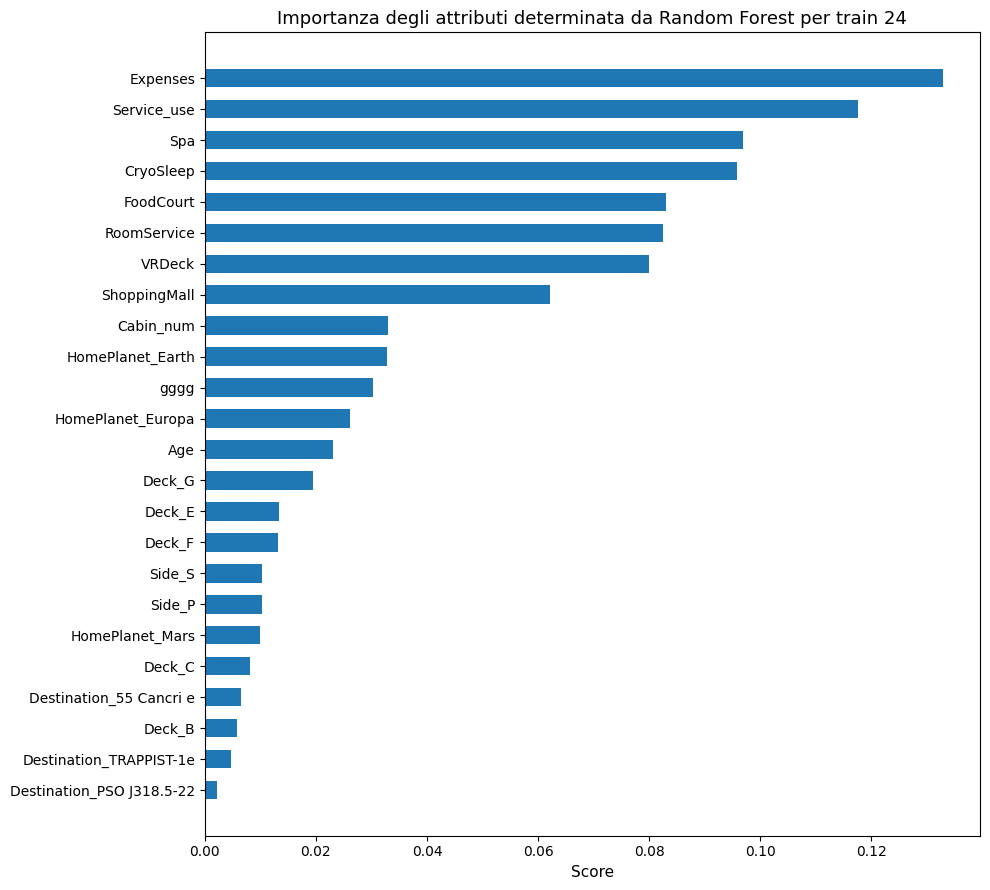

In [68]:
show_sorted_scores_rf(rf22, X_train22, 10, 9, 'per train 24', "Imp_attr_RF_24.png")

In [ ]:
rf13 = RandomForestClassifier(n_estimators=300, max_depth=8, random_state=42, warm_start=True)
rf13.fit(X_train15.drop(columns=['VIP', 'pp']), y_train15)
rf13_score = rf13.score(X_train15.drop(columns=['VIP', 'pp']), y_train15)
print("Score Random Forest X_train15 senza Service_use ed Expenses: " + str(np.round(rf13_score,4)))

rf14 = RandomForestClassifier(n_estimators=300, max_depth=8, random_state=42, warm_start=True)
rf14.fit(X_train13.drop(columns=['Expenses']), y_train15)
rf14_score = rf14.score(X_train13.drop(columns=['Expenses']), y_train15)
print("Score Random Forest X_train15 solo con Service_use: " + str(np.round(rf14_score,4)))

rf15 = RandomForestClassifier(n_estimators=300, max_depth=8, random_state=42, warm_start=True)
rf15.fit(X_train13, y_train15)
rf14_score = rf15.score(X_train13, y_train15)
print("Score Random Forest X_train15 con Service_use ed Expenses: " + str(np.round(rf14_score,4)))

Score Random Forest X_train15 senza Service_use ed Expenses: 0.8368
Score Random Forest X_train15 solo con Service_use: 0.8386
Score Random Forest X_train15 con Service_use ed Expenses: 0.84


In [ ]:
rf22 = RandomForestClassifier(n_estimators=350, max_depth=5, max_features=10, random_state=42, warm_start=True)
rf22.fit(X_train27.drop(columns=['VIP', 'pp', 'Deck_A', 'Deck_T', 'Deck_D']), y_train27)
rf22_score = rf22.score(X_train27.drop(columns=['VIP', 'pp', 'Deck_A', 'Deck_T', 'Deck_D']), y_train27)
print("Score Random Forest su X_train27 senza Service_use ed Expenses: " + str(np.round(rf22_score,4)))

rf23 = RandomForestClassifier(n_estimators=350, max_depth=5, max_features=10, random_state=42, warm_start=True)
rf23.fit(X_train22.drop(columns='Expenses'), y_train27)
rf23_score = rf23.score(X_train22.drop(columns='Expenses'), y_train27)
print("Score Random Forest su X_train27 con solo Service_use: " + str(np.round(rf23_score,4)))

rf24 = RandomForestClassifier(n_estimators=350, max_depth=5, max_features=10, random_state=42, warm_start=True)
rf24.fit(X_train22, y_train27)
rf24_score = rf24.score(X_train22, y_train27)
print("Score Random Forest su X_train27 con Service_use ed Expenses: " + str(np.round(rf24_score,4)))

Score Random Forest su X_train27 senza Service_use ed Expenses: 0.8018
Score Random Forest su X_train27 con solo Service_use: 0.8047
Score Random Forest su X_train27 con Service_use ed Expenses: 0.8032


# Creazione ed esportazione dei dataset definitivi che verranno usati per l'addestramento

In [ ]:
if(not os.path.exists(DATA_PATH + "train_13.csv")):
  X_train13 = X_train15.drop(columns=['VIP', 'pp'])
  X_train13['Transported'] = dataset.Transported.astype(int)
  X_train13.to_csv(DATA_PATH + "train_13.csv")

if(not os.path.exists(DATA_PATH + "train_22.csv")):
  X_train22 = X_train27.drop(columns=['VIP', 'Deck_A', 'Deck_T', 'Deck_D', 'pp'])
  X_train22['Transported'] = dataset.Transported.astype(int)
  X_train22.to_csv(DATA_PATH + "train_22.csv")

In [ ]:
data = pd.read_csv(DATA_PATH + "default_test.csv")
Id = data.PassengerId

if(not os.path.exists(DATA_PATH + "test_13.csv")):
  X_test15 = get_my_numeric_dataframe(DATA_PATH + "default_test.csv")
  X_test13 = X_test15.drop(columns=['VIP', 'pp'])
  X_test13['PassengerId'] = Id
  X_test13.to_csv(DATA_PATH + "test_13.csv")

if(not os.path.exists(DATA_PATH + "train_22.csv")):
  X_test27 = one_hot_encoding_dataframe(DATA_PATH + "default_test.csv")
  X_test22 = X_test27.drop(columns=['VIP', 'Deck_A', 'Deck_T', 'Deck_D', 'pp'])
  X_test22['PassengerId'] = Id
  X_test22.to_csv(DATA_PATH + "test_22.csv")